In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

import tissue.api as tissue

import scanpy as sc
sc.settings.set_figure_params(dpi=80)


In [3]:
raw_path = ''
data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/schuerch/"
buffered_data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/schuerch/refactored/buffer"

In [8]:
data_origin = 'schuerch'
survival_name = 'DFSmonth'
grade_name = 'Group'
save = None
suffix = '.pdf'

In [9]:
save = "/lustre/groups/ml01/workspace/mayar.ali/tissue/figures/schuerch/"

In [10]:
interpreter = tissue.fits.InterpreterGraph(results_path='', model_id='', cv='', model_class='')

In [14]:
transform="standardize_globally"
interpreter.get_data(
    data_origin=data_origin,
    data_path=raw_path,
    buffered_data_path=buffered_data_path,
    write_buffer=False,
    radius=50,
    cell_type_coarseness='binary',
    target_label=grade_name,
    graph_label_selection=[grade_name],
    graph_covar_selection=[],
    node_feature_transformation=transform,
    adj_type="full",
)

/lustre/groups/ml01/workspace/mayar.ali/tissue/data/schuerch/refactored/buffer/buffered_data_50_binary.pickle
Loading data from buffer
Loaded 140 images with complete data from 35 patients over 258385 cells with 57 cell features and 2 distinct celltypes.

Whole dataset: 140 images from 35 patients.
Test dataset: 16 images from 4 patients.
Training dataset: 112 images from 28 patients.
Validation dataset: 12 images from 3 patients.



## Number Nodes

In [15]:
keys = list(interpreter.data.img_celldata.keys())
nr_nodes = np.array([interpreter.a[key].shape[0] for key in keys])

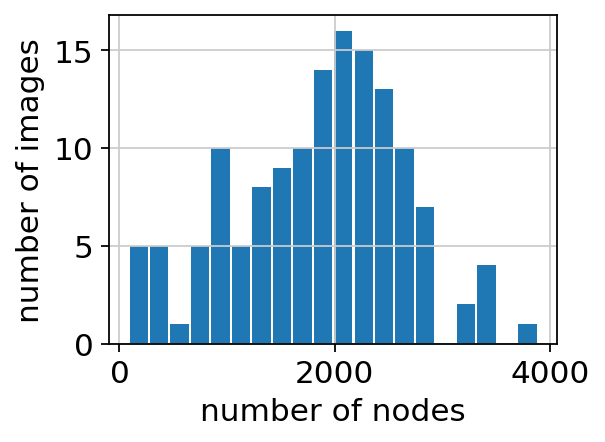

In [25]:
plt.figure(figsize=(4,3))
plt.hist(nr_nodes, bins=20, rwidth=0.9)
plt.xlabel('number of nodes')
plt.ylabel('number of images')

if save is not None:
    plt.tight_layout()
    plt.savefig(save + '_hist_nr_nodes_dpi80' + suffix)

In [19]:
print('min:', np.min(nr_nodes), '     max:', np.max(nr_nodes))

min: 84      max: 3887


In [20]:
print("mean number of nodes:", np.mean(nr_nodes))

mean number of nodes: 1845.607142857143


In [21]:
print("median number of nodes:", np.median(nr_nodes))

median number of nodes: 1979.0


#### Degree vs Distance

In [22]:
dists = np.square(np.arange(4, 50, 2)) // 4

1.0032879143428117
1.025202911830189
1.4177667265315956
2.56106902346913
4.620586539971096
7.872619657321911
12.714688468736014
19.52954741649492
28.77648490077265
40.8992290878384
56.37486200116261
75.6514567223524
99.21423934562642
127.4466691566482
160.71233337581901
199.3655657596683
243.74111806502884
293.9233820670677
350.03002152788736
412.0413068707207
479.8529993015298
553.2499170254854
631.8632519423827


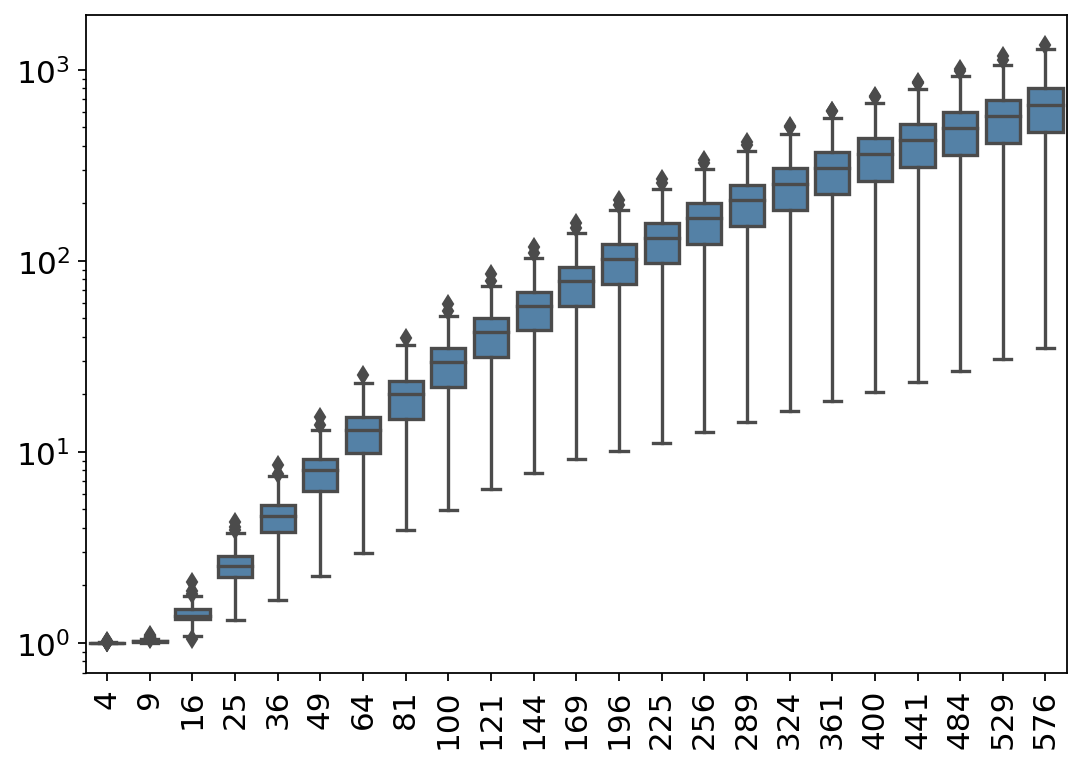

In [23]:
interpreter.data.plot_degree_vs_dist(
    max_distances=dists,
    save = save + '_all_dpi80',
    panel_width=7,
    panel_height=5,
)

2.56106902346913
8.151810911740514
40.28233341422723
1845.519572674249


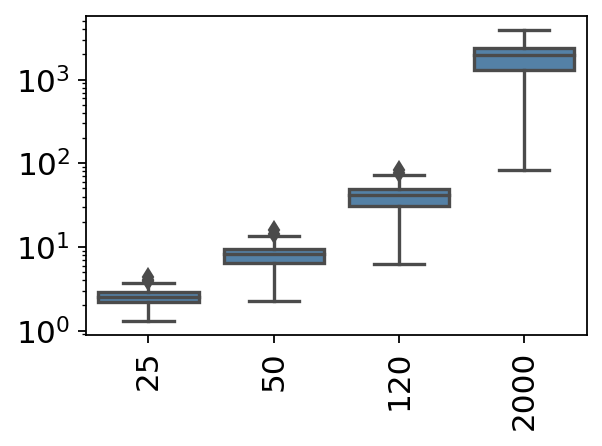

In [24]:
interpreter.data.plot_degree_vs_dist(
    max_distances=[25, 50, 120, 2000],
    save = save+'_dpi80',
)

#### Node feature transformation

In [26]:
keys = [
    'reg034_B', 'reg040_B', 'reg038_A', 'reg010_B', 'reg006_B',
    'reg022_A', 'reg020_B', 'reg056_B', 'reg042_A', 'reg060_B',
]

In [29]:
interpreter.data.img_celldata[keys[0]].uns["node_type_names"]

{'immune cells': 'immune cells', 'other': 'other'}

/lustre/groups/ml01/workspace/mayar.ali/tissue/data/schuerch/refactored/buffer/buffered_data_50_binary.pickle
Loading data from buffer
Loaded 140 images with complete data from 35 patients over 258385 cells with 57 cell features and 2 distinct celltypes.

Whole dataset: 140 images from 35 patients.
Test dataset: 16 images from 4 patients.
Training dataset: 112 images from 28 patients.
Validation dataset: 12 images from 3 patients.



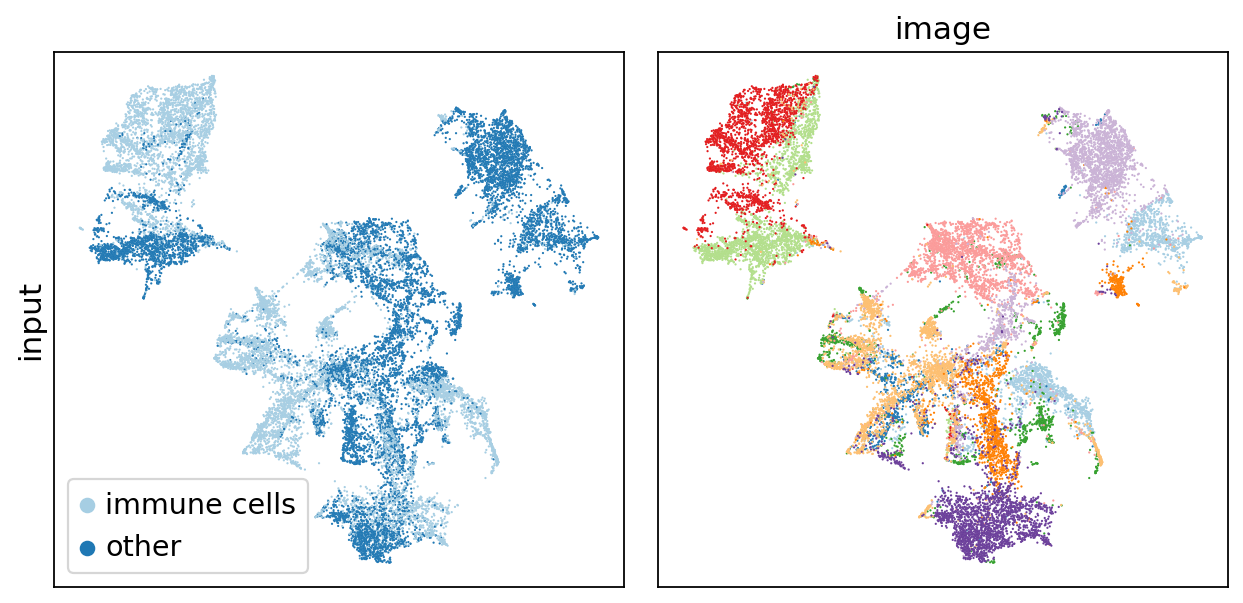

/lustre/groups/ml01/workspace/mayar.ali/tissue/data/schuerch/refactored/buffer/buffered_data_50_binary.pickle
Loading data from buffer
Loaded 140 images with complete data from 35 patients over 258385 cells with 57 cell features and 2 distinct celltypes.

Whole dataset: 140 images from 35 patients.
Test dataset: 16 images from 4 patients.
Training dataset: 112 images from 28 patients.
Validation dataset: 12 images from 3 patients.



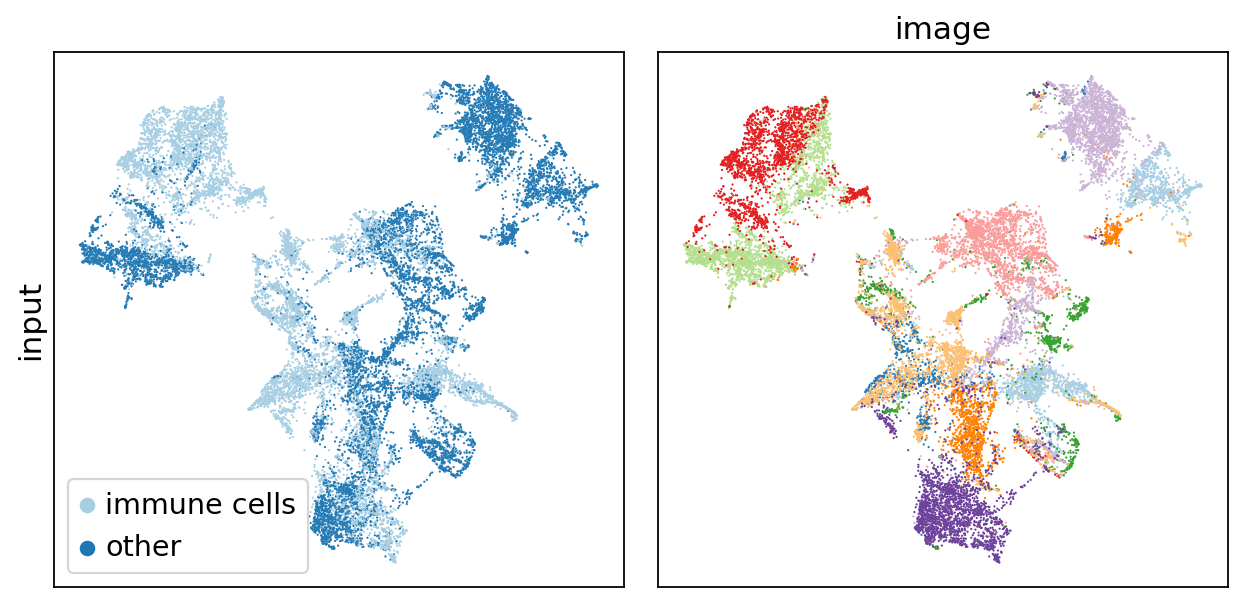

/lustre/groups/ml01/workspace/mayar.ali/tissue/data/schuerch/refactored/buffer/buffered_data_50_binary.pickle
Loading data from buffer
Loaded 140 images with complete data from 35 patients over 258385 cells with 57 cell features and 2 distinct celltypes.

Whole dataset: 140 images from 35 patients.
Test dataset: 16 images from 4 patients.
Training dataset: 112 images from 28 patients.
Validation dataset: 12 images from 3 patients.



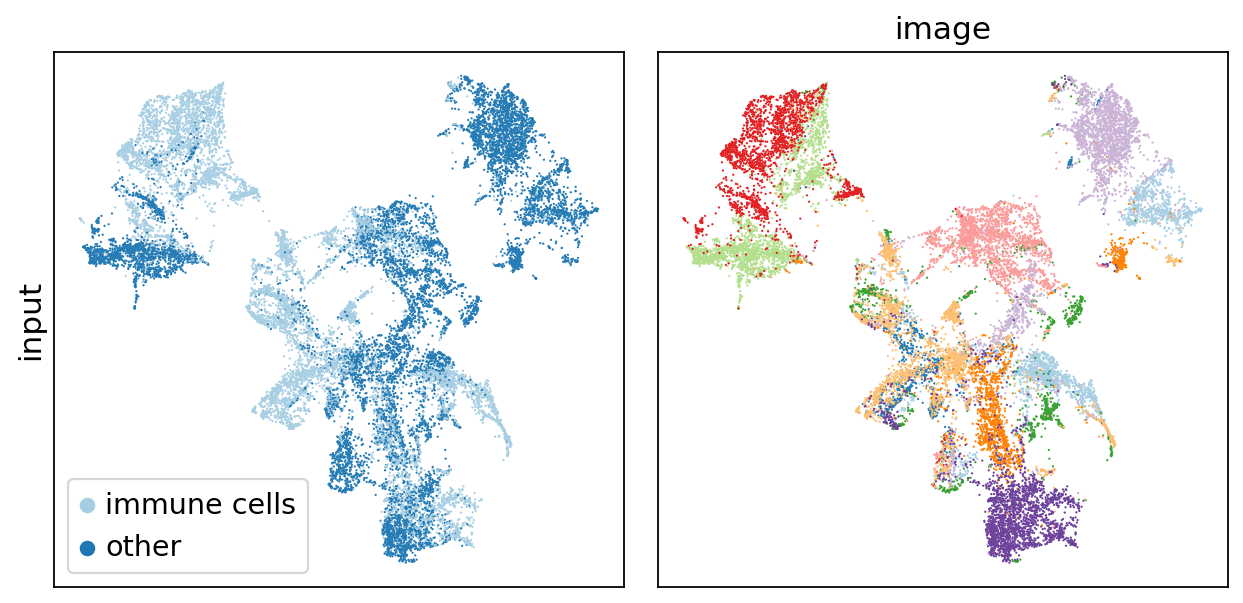

In [36]:
if save is not None:
    filename = save + '_subset_images_dpi80'
else:
    filename = None
    
for transform in ['standardize_per_image', 'standardize_globally', 'none']:
    interpreter.get_data(
        data_origin=data_origin,
        data_path=raw_path,
        buffered_data_path=buffered_data_path,
        write_buffer=False,
        radius=50,
        cell_type_coarseness='binary',
        target_label=grade_name,
        graph_label_selection=[grade_name],
        graph_covar_selection=[],
        node_feature_transformation=transform,
        adj_type="full",
    )
    interpreter.plot_umap_nodes(
        keys,
        save = filename + transform,
        plot_types = ['types', 'images'],
        layer_names=['input'],
        panel_height=4,
        panel_width=4,
    )